# Flight Analysis
Logistic Regression Model and Visualisation

Part 2 QC


In [1]:
#Importing the required libraries for data wrangling and visualisations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing the required Machine Learning libraries
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest  

Preparing the dataset for logistic regression model creation and visualisations.

In [3]:
#Loading the seperately cleaned dataset for Part2 QC 
df_main = pd.read_csv('C:\\Users\\bhagy\\Programming CourseWork\\Python\\Cleaned_Dataframe_Part2QC_for_Flight_Analysis.csv')

In [4]:
#View the dataset
df_main.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,Origin,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2006,1,11,3,745,1018,US,343,ATL,...,1587,45,13,0,0,0,0,0,0,0
1,1,2006,1,11,3,1053,1318,US,613,ATL,...,1587,27,19,0,0,0,0,0,0,0
2,2,2006,1,11,3,1915,2133,US,617,ATL,...,1587,4,11,0,0,0,0,0,0,0
3,3,2006,1,11,3,1755,1933,US,300,AUS,...,872,16,10,0,0,0,0,0,0,0
4,4,2006,1,11,3,832,1015,US,765,AUS,...,872,27,12,0,0,0,0,0,0,0


In [5]:
#Loading the 'airports' dataset
df_a = pd.read_csv('C:\\Users\\bhagy\\Programming CourseWork\\Python\\Airports_Cleaned.csv')
df_a

,Unnamed: 0,iata,airport,city,state,country,lat,long
0,0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
...,...,...,...,...,...,...,...,...
3359,3371,ZEF,Elkin Municipal,Elkin,NC,USA,36.280024,-80.786069
3360,3372,ZER,Schuylkill Cty/Joe Zerbey,Pottsville,PA,USA,40.706449,-76.373147
3361,3373,ZPH,Zephyrhills Municipal,Zephyrhills,FL,USA,28.228065,-82.155916
3362,3374,ZUN,Black Rock,Zuni,NM,USA,35.083227,-108.791777


In [6]:
#Renaming the column 'iata' to 'IATA Code' for merging purposes.
df_a.rename(columns={'iata':'IATA Code', }, inplace = True)
df_a

,Unnamed: 0,IATA Code,airport,city,state,country,lat,long
0,0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
...,...,...,...,...,...,...,...,...
3359,3371,ZEF,Elkin Municipal,Elkin,NC,USA,36.280024,-80.786069
3360,3372,ZER,Schuylkill Cty/Joe Zerbey,Pottsville,PA,USA,40.706449,-76.373147
3361,3373,ZPH,Zephyrhills Municipal,Zephyrhills,FL,USA,28.228065,-82.155916
3362,3374,ZUN,Black Rock,Zuni,NM,USA,35.083227,-108.791777


In [7]:
#Merging the dataframe with the airports dataframe to obtain the coordinates(lat & long) of the corresponding Origin and Destination airports.                                                                                                                                                                                                                                                                                                                                                              
df_main['Origin Lat'] = df_main['Origin'].map(df_a.set_index('IATA Code')['lat'])
df_main['Origin Long'] = df_main['Origin'].map(df_a.set_index('IATA Code')['long'])
df_main['Dest Lat'] = df_main['Dest'].map(df_a.set_index('IATA Code')['lat'])
df_main['Dest Long'] = df_main['Dest'].map(df_a.set_index('IATA Code')['long'])
df_main.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,Origin,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Origin Lat,Origin Long,Dest Lat,Dest Long
0,0,2006,1,11,3,745,1018,US,343,ATL,...,0,0,0,0,0,0,33.640444,-84.426944,33.434167,-112.008056
1,1,2006,1,11,3,1053,1318,US,613,ATL,...,0,0,0,0,0,0,33.640444,-84.426944,33.434167,-112.008056
2,2,2006,1,11,3,1915,2133,US,617,ATL,...,0,0,0,0,0,0,33.640444,-84.426944,33.434167,-112.008056
3,3,2006,1,11,3,1755,1933,US,300,AUS,...,0,0,0,0,0,0,30.194533,-97.669872,33.434167,-112.008056
4,4,2006,1,11,3,832,1015,US,765,AUS,...,0,0,0,0,0,0,30.194533,-97.669872,33.434167,-112.008056


In [8]:
#Rounding off 'Origin Lat','Origin Long','Dest Lat', and 'Dest Long' columns to 1 decimal place
df_main[['Origin Lat','Origin Long','Dest Lat','Dest Long']] = \
df_main[['Origin Lat','Origin Long','Dest Lat','Dest Long']].round(1)
df_main.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,Origin,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Origin Lat,Origin Long,Dest Lat,Dest Long
0,0,2006,1,11,3,745,1018,US,343,ATL,...,0,0,0,0,0,0,33.6,-84.4,33.4,-112.0
1,1,2006,1,11,3,1053,1318,US,613,ATL,...,0,0,0,0,0,0,33.6,-84.4,33.4,-112.0
2,2,2006,1,11,3,1915,2133,US,617,ATL,...,0,0,0,0,0,0,33.6,-84.4,33.4,-112.0
3,3,2006,1,11,3,1755,1933,US,300,AUS,...,0,0,0,0,0,0,30.2,-97.7,33.4,-112.0
4,4,2006,1,11,3,832,1015,US,765,AUS,...,0,0,0,0,0,0,30.2,-97.7,33.4,-112.0


In [9]:
#Dropping the unneccessary columns in the merged dataframe 
df_main = df_main.drop(['Unnamed: 0'], axis=1)
df_main.head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,Origin,Dest,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Origin Lat,Origin Long,Dest Lat,Dest Long
0,2006,1,11,3,745,1018,US,343,ATL,PHX,...,0,0,0,0,0,0,33.6,-84.4,33.4,-112.0
1,2006,1,11,3,1053,1318,US,613,ATL,PHX,...,0,0,0,0,0,0,33.6,-84.4,33.4,-112.0
2,2006,1,11,3,1915,2133,US,617,ATL,PHX,...,0,0,0,0,0,0,33.6,-84.4,33.4,-112.0
3,2006,1,11,3,1755,1933,US,300,AUS,PHX,...,0,0,0,0,0,0,30.2,-97.7,33.4,-112.0
4,2006,1,11,3,832,1015,US,765,AUS,PHX,...,0,0,0,0,0,0,30.2,-97.7,33.4,-112.0


In [10]:
#Checking for any data types that require encoding
df_main.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
CRSDepTime             int64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
Origin                object
Dest                  object
Distance               int64
TaxiIn                 int64
TaxiOut                int64
Cancelled              int64
Diverted               int64
CarrierDelay           int64
WeatherDelay           int64
NASDelay               int64
SecurityDelay          int64
LateAircraftDelay      int64
Origin Lat           float64
Origin Long          float64
Dest Lat             float64
Dest Long            float64
dtype: object

In [11]:
#Encoding the categorical variables
label_encoder = LabelEncoder()
#Converting categorical variables ('UniqueCarrier', 'Origin', and 'Dest') into numerical values.
df_main['UniqueCarrier'] = label_encoder.fit_transform(df_main['UniqueCarrier'])
df_main['Origin'] = label_encoder.fit_transform(df_main['Origin'])
df_main['Dest'] = label_encoder.fit_transform(df_main['Dest'])
df_main.head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,Origin,Dest,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Origin Lat,Origin Long,Dest Lat,Dest Long
0,2006,1,11,3,745,1018,17,343,19,229,...,0,0,0,0,0,0,33.6,-84.4,33.4,-112.0
1,2006,1,11,3,1053,1318,17,613,19,229,...,0,0,0,0,0,0,33.6,-84.4,33.4,-112.0
2,2006,1,11,3,1915,2133,17,617,19,229,...,0,0,0,0,0,0,33.6,-84.4,33.4,-112.0
3,2006,1,11,3,1755,1933,17,300,21,229,...,0,0,0,0,0,0,30.2,-97.7,33.4,-112.0
4,2006,1,11,3,832,1015,17,765,21,229,...,0,0,0,0,0,0,30.2,-97.7,33.4,-112.0


In [12]:
#Checking for null values in the dataframe
pd.isnull(df_main).sum(axis=0)

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
CRSDepTime               0
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                   0
TaxiOut                  0
Cancelled                0
Diverted                 0
CarrierDelay             0
WeatherDelay             0
NASDelay                 0
SecurityDelay            0
LateAircraftDelay        0
Origin Lat           10315
Origin Long          10315
Dest Lat             10316
Dest Long            10316
dtype: int64

In [13]:
#Removing the existing null values
df_main = df_main.dropna(subset=['Origin Lat', 'Origin Long', 'Dest Lat', 'Dest Long'])
#Rechecking for null values in the dataframe
pd.isnull(df_main).sum(axis=0)

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
CRSDepTime           0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
Origin Lat           0
Origin Long          0
Dest Lat             0
Dest Long            0
dtype: int64

In [14]:
#Inspecting value counts for the 'Diverted' column
df_main['Diverted'].value_counts()

Diverted
0    14541203
1       32577
Name: count, dtype: int64

In [15]:
#Splitting the dataframe for yearly analysis
df_2006 = df_main[df_main['Year'] == 2006]
df_2007 = df_main[df_main['Year'] == 2007]

In [16]:
#2006 'Diverted' value counts
df_2006['Diverted'].value_counts()

Diverted
0    7116083
1      16154
Name: count, dtype: int64

In [17]:
#2007 'Diverted' value counts
df_2007['Diverted'].value_counts()

Diverted
0    7425120
1      16423
Name: count, dtype: int64

---

# Logistic regression model - 2006

<Axes: >

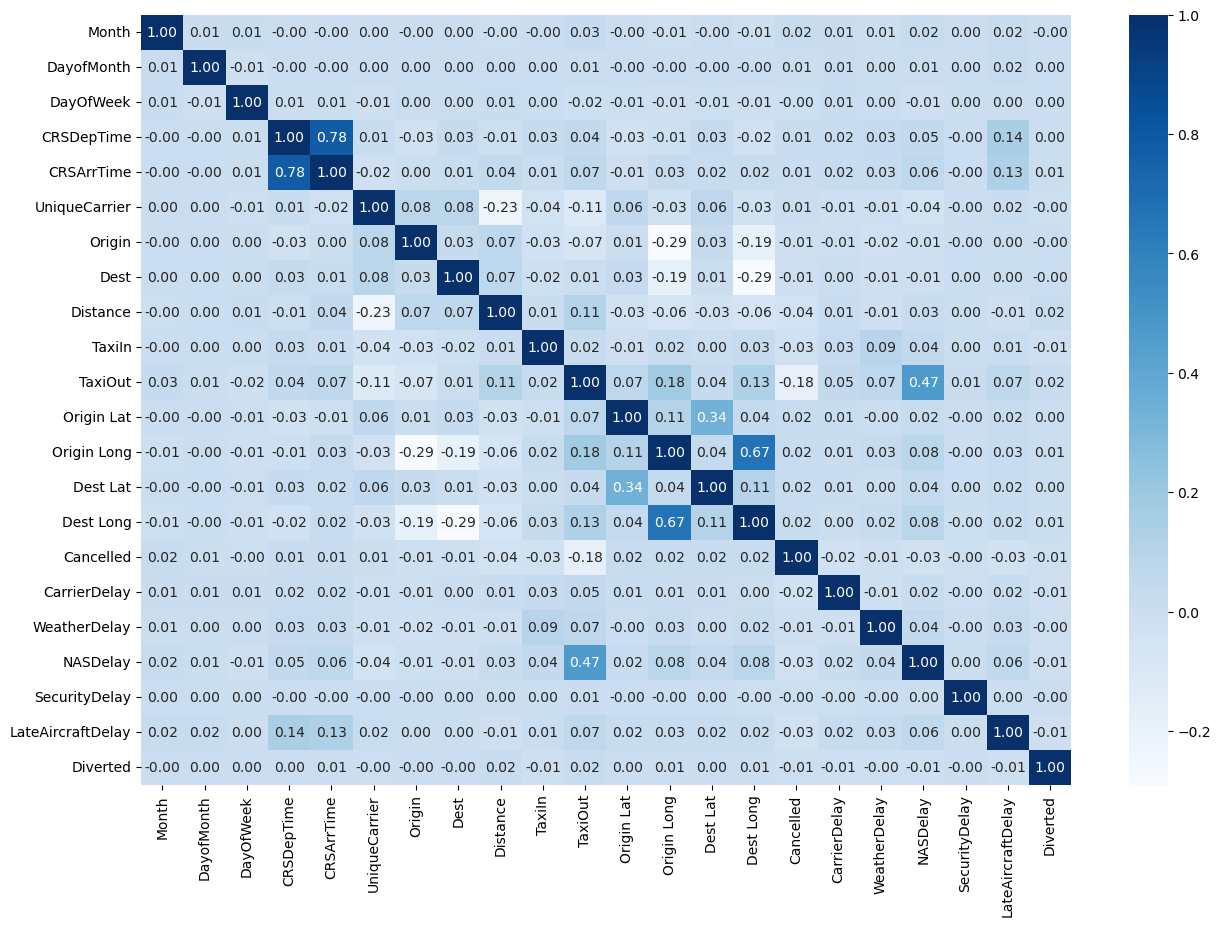

In [18]:
#Creating a heatmap to analyse the correlation among potential features and target variable
columns=['Month','DayofMonth','DayOfWeek','CRSDepTime','CRSArrTime','UniqueCarrier','Origin','Dest',\
         'Distance','TaxiIn','TaxiOut','Origin Lat','Origin Long','Dest Lat','Dest Long','Cancelled',\
         'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay','Diverted']
plt.figure(len(columns),figsize=(15,10))
correlation = df_2006[columns].corr()
sns.heatmap(correlation,cmap='Blues',annot=True, fmt='.2f')

In [19]:
#Selecting features and splitting the dataset into features and target variable
features = ['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime', 'UniqueCarrier',\
            'Distance', 'TaxiOut', 'Origin Lat', 'Origin Long', 'Dest Lat', 'Dest Long']
X = df_2006[features]
Y = df_2006['Diverted']

In [20]:
#Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=16)

In [21]:
#Standardizing the features using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
#Undersampling the majority class in train data to handle the data imbalance
random_undersampler = RandomUnderSampler(random_state=123)
X_train_resampled, Y_train_resampled = random_undersampler.fit_resample(X_train_scaled, Y_train)

In [23]:
#Developing the logistic regression model and prediction
logreg = LogisticRegression(class_weight='balanced', random_state=16)
logreg.fit(X_train_resampled, Y_train_resampled)
Y_prediction = logreg.predict(X_test_scaled)

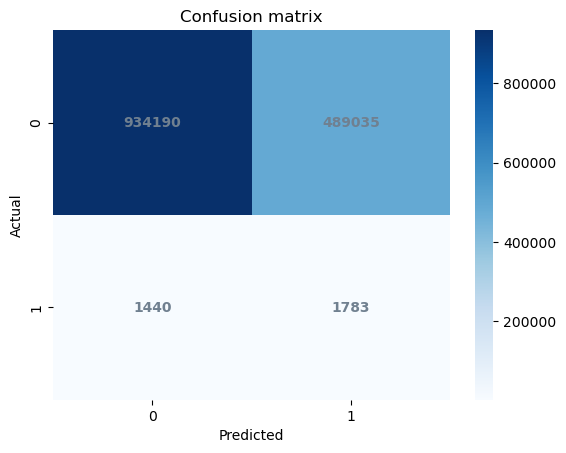

In [24]:
#Creating the confusion matrix
confusionmatrix = confusion_matrix(Y_test, Y_prediction)
#Plotting the confusion matrix
plt.figure()
sns.heatmap(pd.DataFrame(confusionmatrix), annot=True, cmap='Blues', fmt='d', annot_kws={'color': 'slategray', 'fontweight': 'bold'})
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [25]:
#Obtaining the classification report of the model
print(classification_report(Y_test, Y_prediction, target_names=['Not Diverted', 'Diverted']))

              precision    recall  f1-score   support

Not Diverted       1.00      0.66      0.79   1423225
    Diverted       0.00      0.55      0.01      3223

    accuracy                           0.66   1426448
   macro avg       0.50      0.60      0.40   1426448
weighted avg       1.00      0.66      0.79   1426448



In [26]:
#Evaluating the accuracy
accuracy = accuracy_score(Y_test, Y_prediction)
print("Accuracy:", accuracy)

Accuracy: 0.6561564108891457


Visualising the coefficients

In [27]:
#Extracting coefficients and corresponding feature names
coefficients = logreg.coef_[0]
feature_names = X.columns

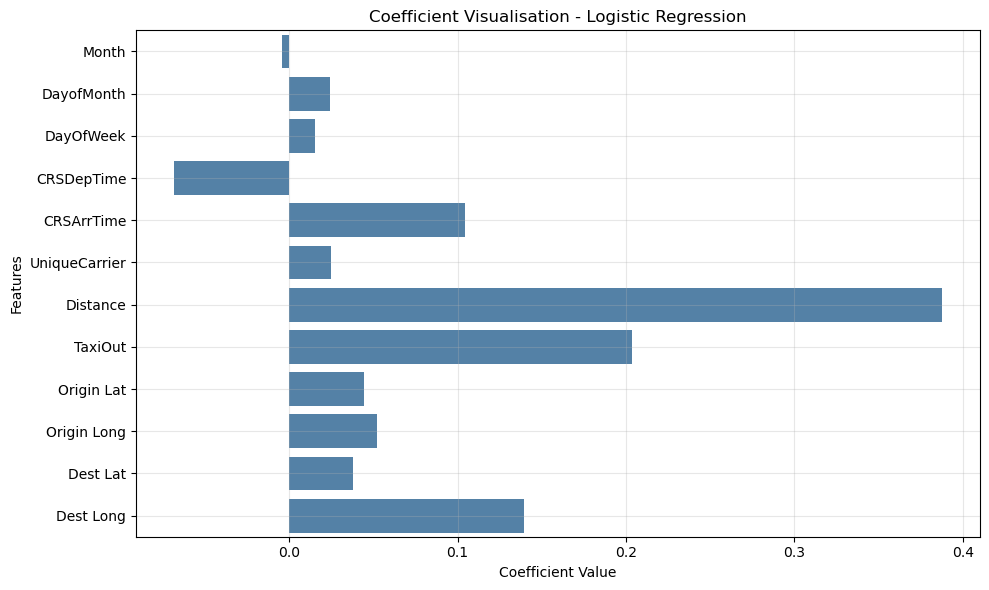

In [28]:
#Plotting coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=feature_names, color='steelblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Coefficient Visualisation - Logistic Regression')
plt.grid(True, alpha=0.3)  # Set alpha to control transparency
plt.tight_layout()
plt.show()

In [29]:
#Selecting features and splitting the dataset into features and target variable
features_with_TaxiIn = ['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime', 'UniqueCarrier',\
                        'Distance', 'TaxiIn','TaxiOut', 'Origin Lat', 'Origin Long', \
                        'Dest Lat', 'Dest Long']
X = df_2006[features_with_TaxiIn]
Y = df_2006['Diverted']

In [30]:
#Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=16)

In [31]:
#Standardizing the features using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
#Undersampling the majority class training data to handle the data imbalance
random_undersampler = RandomUnderSampler(random_state=123)
X_train_resampled, Y_train_resampled = random_undersampler.fit_resample(X_train_scaled, Y_train)

In [33]:
#Developing the logistic regression model and prediction
logreg = LogisticRegression(class_weight='balanced', random_state=16)
logreg.fit(X_train_resampled, Y_train_resampled)
Y_prediction = logreg.predict(X_test_scaled)

In [34]:
# Extracting coefficients and corresponding feature names
coefficients = logreg.coef_[0]
feature_names = X.columns

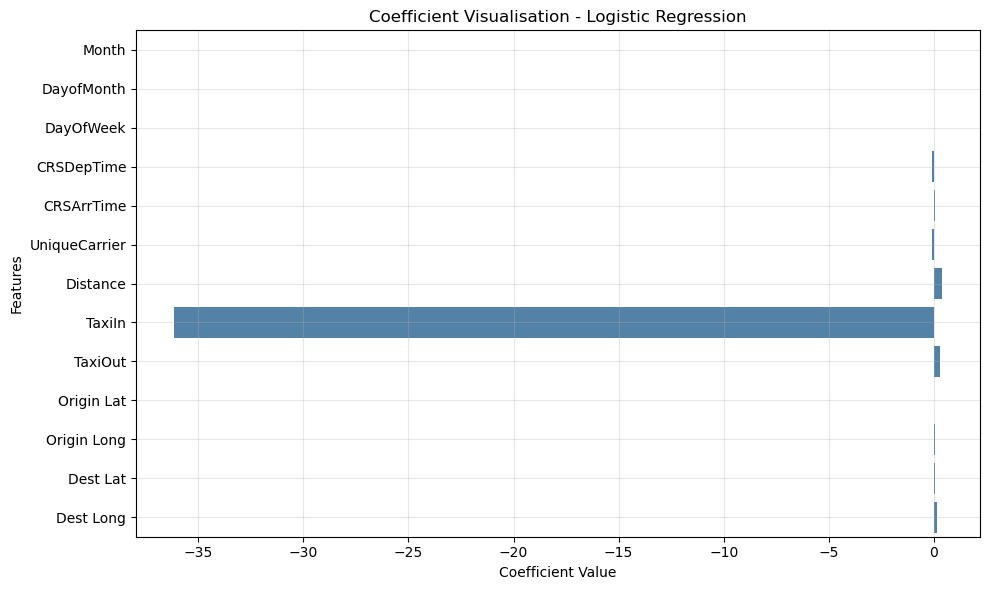

In [35]:
# Plotting coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=feature_names, color='steelblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Coefficient Visualisation - Logistic Regression')
plt.grid(True, alpha=0.3)  # Set alpha to control transparency
plt.tight_layout()
plt.show()

---

# Logistic regression model - 2007

<Axes: >

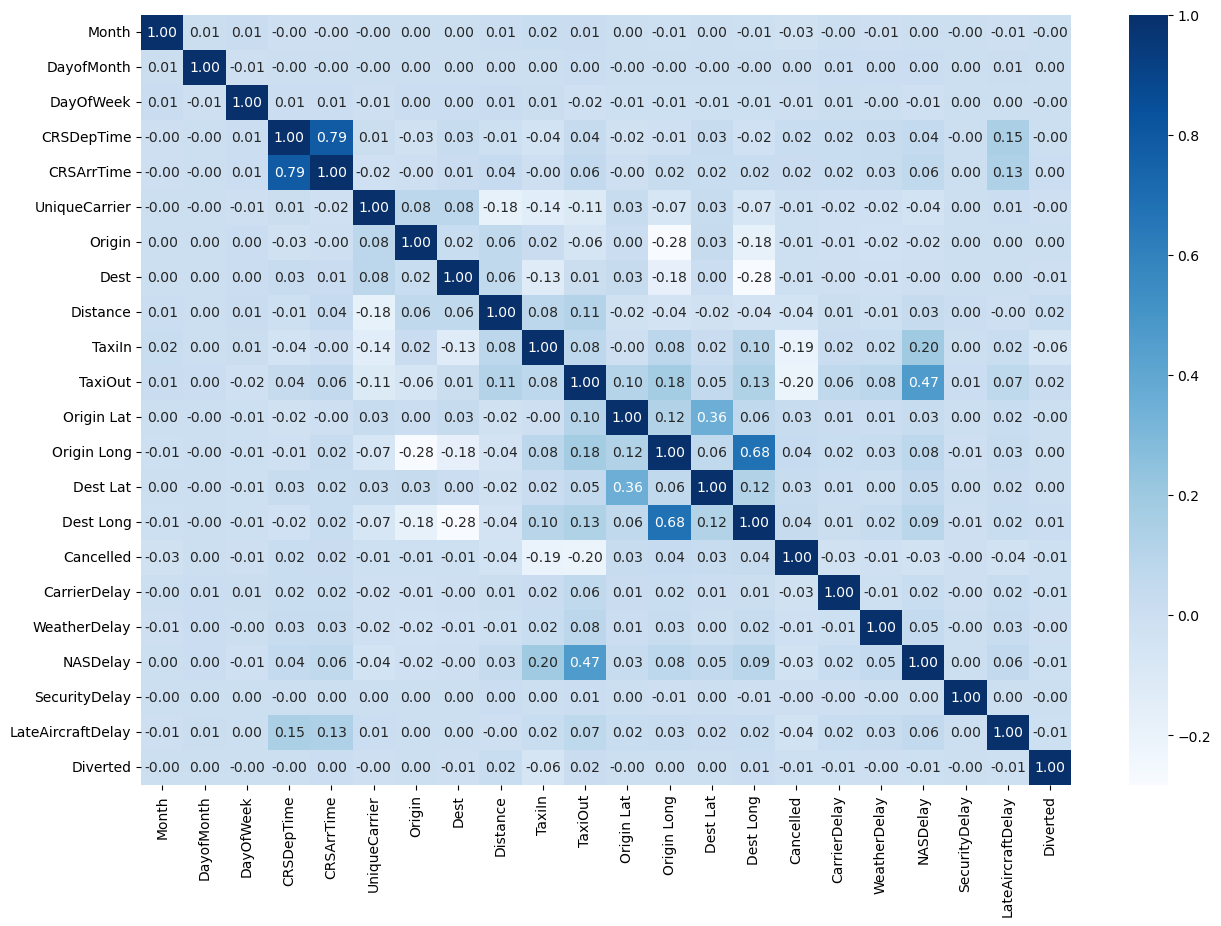

In [36]:
#Creating a heatmap to analyse the correlation among potential features and target variable
columns=['Month','DayofMonth','DayOfWeek','CRSDepTime','CRSArrTime','UniqueCarrier','Origin','Dest',\
         'Distance','TaxiIn','TaxiOut','Origin Lat','Origin Long','Dest Lat','Dest Long','Cancelled',\
         'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay','Diverted']
plt.figure(len(columns),figsize=(15,10))
correlation = df_2007[columns].corr()
sns.heatmap(correlation,cmap='Blues',annot=True, fmt='.2f')

In [37]:
#Selecting features and splitting the dataset into features and target variable
features = ['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime', 'UniqueCarrier',\
            'Distance', 'TaxiOut', 'Origin Lat', 'Origin Long', 'Dest Lat', 'Dest Long']
X = df_2007[features]
Y = df_2007['Diverted'] 

In [38]:
#Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=16)

In [39]:
#Standardizing the features using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
#Undersampling the majority class in train data to handle the data imbalance
random_undersampler = RandomUnderSampler(random_state=123)
X_train_resampled, Y_train_resampled = random_undersampler.fit_resample(X_train_scaled, Y_train)

In [41]:
#Developing the logistic regression model and prediction
logreg = LogisticRegression(class_weight='balanced', random_state=16)
logreg.fit(X_train_resampled, Y_train_resampled)
Y_prediction = logreg.predict(X_test_scaled)

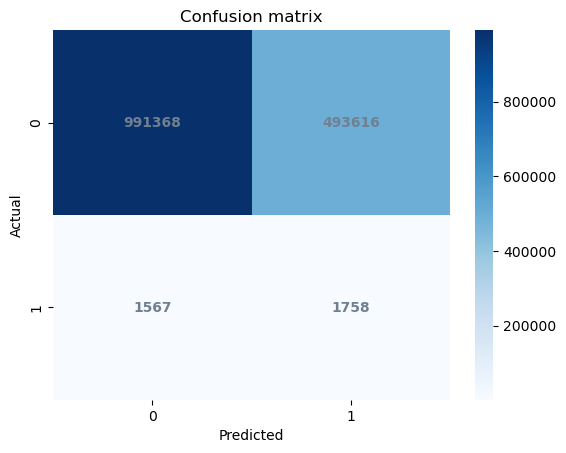

In [42]:
#Creating the confusion matrix
confusionmatrix = confusion_matrix(Y_test, Y_prediction)
#Plotting the confusion matrix
plt.figure()
sns.heatmap(pd.DataFrame(confusionmatrix), annot=True, cmap='Blues', fmt='d', annot_kws={'color': 'slategray', 'fontweight': 'bold'})
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [43]:
#Obtaining the classification report of the model
print(classification_report(Y_test, Y_prediction, target_names=['Not Diverted', 'Diverted']))

              precision    recall  f1-score   support

Not Diverted       1.00      0.67      0.80   1484984
    Diverted       0.00      0.53      0.01      3325

    accuracy                           0.67   1488309
   macro avg       0.50      0.60      0.40   1488309
weighted avg       1.00      0.67      0.80   1488309



In [44]:
#Evaluating the accuracy
accuracy = accuracy_score(Y_test, Y_prediction)
print("Accuracy:", accuracy)

Accuracy: 0.6672848178704825


Visualising the coefficients

In [45]:
# Extracting coefficients and corresponding feature names
coefficients = logreg.coef_[0]
feature_names = X.columns

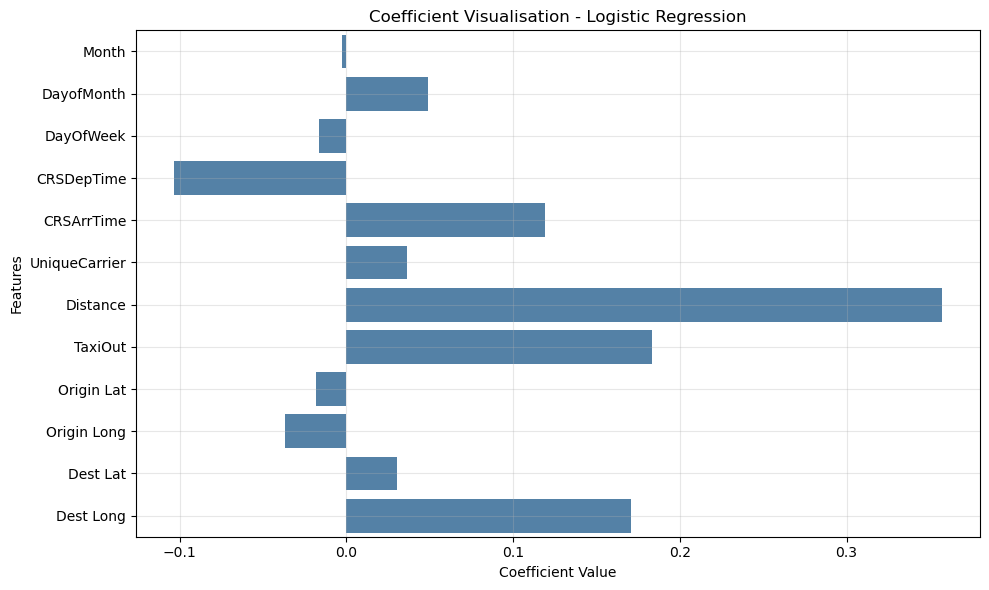

In [46]:
# Plotting coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=feature_names, color='steelblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Coefficient Visualisation - Logistic Regression')
plt.grid(True, alpha=0.3)  # Set alpha to control transparency
plt.tight_layout()
plt.show()

---

Visualising the coefficients with TaxiIn

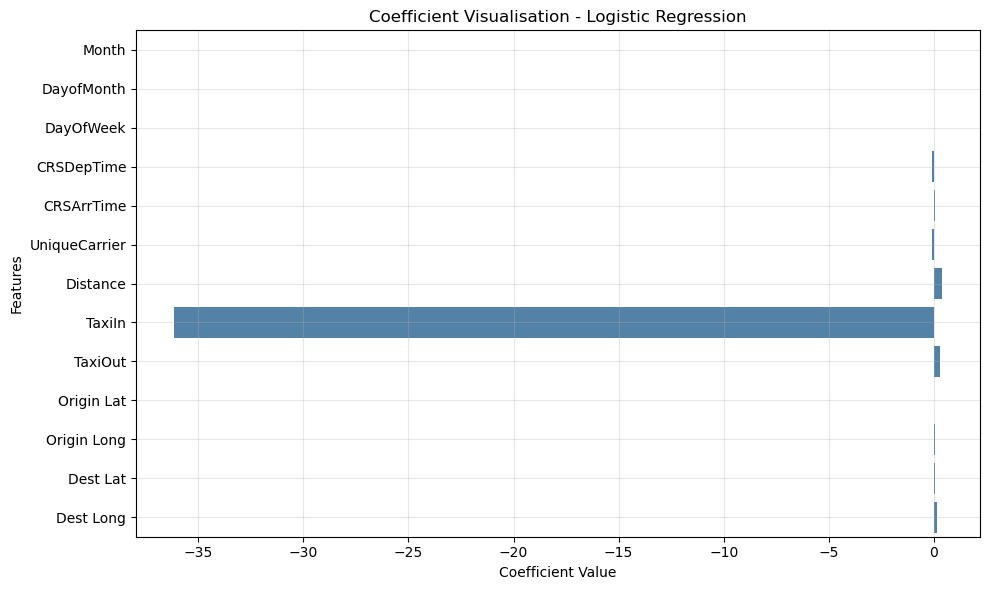

In [47]:
#Selecting features and splitting the dataset into features and target variable
features_with_TaxiIn = ['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime', 'UniqueCarrier',\
                        'Distance', 'TaxiIn','TaxiOut', 'Origin Lat', 'Origin Long', \
                        'Dest Lat', 'Dest Long']
X = df_2006[features_with_TaxiIn]
Y = df_2006['Diverted']

#Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=16)

#Standardizing the features using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Undersampling the majority class training data to handle the data imbalance
random_undersampler = RandomUnderSampler(random_state=123)
X_train_resampled, Y_train_resampled = random_undersampler.fit_resample(X_train_scaled, Y_train)

#Developing the logistic regression model and prediction
logreg = LogisticRegression(class_weight='balanced', random_state=16)
logreg.fit(X_train_resampled, Y_train_resampled)
Y_prediction = logreg.predict(X_test_scaled)

# Extracting coefficients and corresponding feature names
coefficients = logreg.coef_[0]
feature_names = X.columns

# Plotting coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=feature_names, color='steelblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Coefficient Visualisation - Logistic Regression')
plt.grid(True, alpha=0.3)  # Set alpha to control transparency
plt.tight_layout()
plt.show()

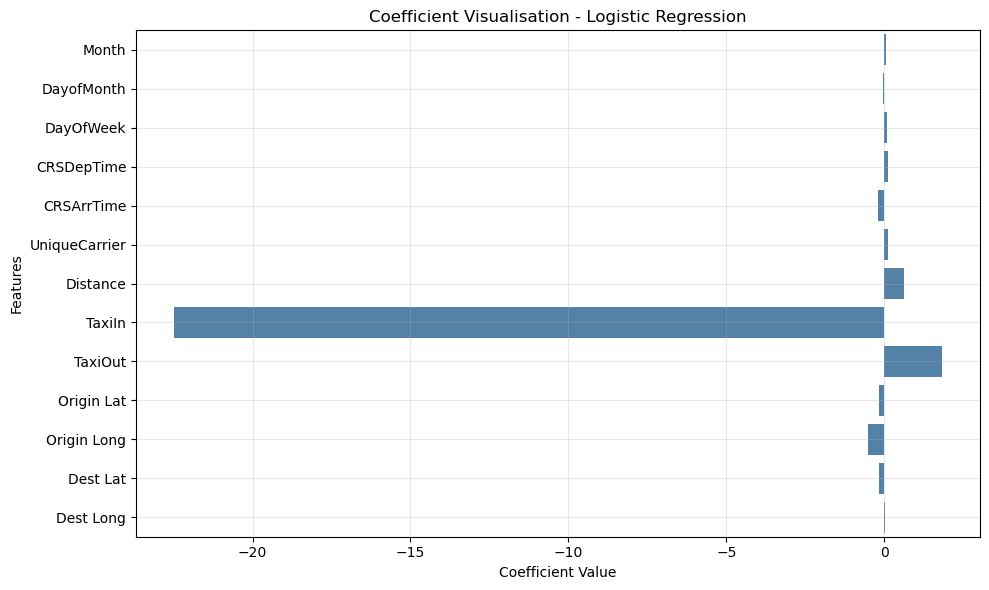

In [48]:
#Selecting features and splitting the dataset into features and target variable
features_with_TaxiIn = ['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime', 'UniqueCarrier',\
                        'Distance', 'TaxiIn','TaxiOut', 'Origin Lat', 'Origin Long', \
                        'Dest Lat', 'Dest Long']
X = df_2007[features_with_TaxiIn]
Y = df_2007['Diverted']

#Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=16)

#Standardizing the features using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Undersampling the majority class training data to handle the data imbalance
random_undersampler = RandomUnderSampler(random_state=123)
X_train_resampled, Y_train_resampled = random_undersampler.fit_resample(X_train_scaled, Y_train)

#Developing the logistic regression model and prediction
logreg = LogisticRegression(class_weight='balanced', random_state=16)
logreg.fit(X_train_resampled, Y_train_resampled)
Y_prediction = logreg.predict(X_test_scaled)

# Extracting coefficients and corresponding feature names
coefficients = logreg.coef_[0]
feature_names = X.columns

# Plotting coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=feature_names, color='steelblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Coefficient Visualisation - Logistic Regression')
plt.grid(True, alpha=0.3)  # Set alpha to control transparency
plt.tight_layout()
plt.show()

---